# Import Libraries

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
# Dataset
df = pd.read_csv('Tweets.csv')
df = df[['text', 'airline_sentiment']]
df.rename(columns={'airline_sentiment': 'sentiment'}, inplace=True)
df.head()

,text,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


# Exploratory Data Analysis (EDA)

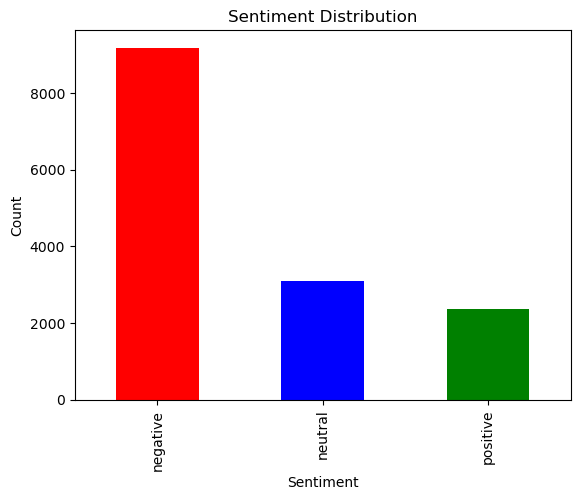

In [6]:
df['sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [7]:
print("Dataset Size:", df.shape)
print("Class Balance:\n", df['sentiment'].value_counts(normalize=True))


Dataset Size: (14640, 2)
Class Balance:
 sentiment
negative    0.626913
neutral     0.211680
positive    0.161407
Name: proportion, dtype: float64


# Text Preprocessing

In [8]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


# Text Vectorization

In [9]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()

# Encode sentiment labels
y = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})


# Model Building

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [11]:
#Model Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


Accuracy: 0.7974726775956285

Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.94      0.88      1889
     Neutral       0.67      0.49      0.57       580
    Positive       0.82      0.60      0.69       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928



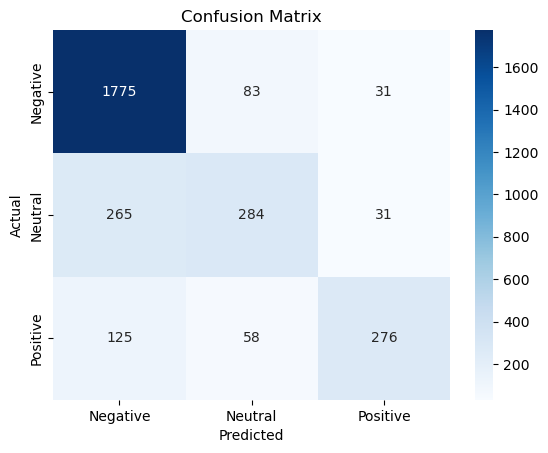

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Insights and Observations

In [13]:
from sklearn.feature_selection import chi2

features = tfidf.get_feature_names_out()
chi_scores = chi2(X, y)[0]

# Top terms correlated with each class
for i, sentiment in enumerate(['Negative', 'Neutral', 'Positive']):
    indices = np.argsort(chi_scores)[-10:]
    top_features = [features[j] for j in indices]
    print(f"Top words for {sentiment} sentiment:", top_features)


Top words for Negative sentiment: ['much', 'best', 'amazing', 'love', 'fleets', 'fleek', 'awesome', 'great', 'thanks', 'thank']
Top words for Neutral sentiment: ['much', 'best', 'amazing', 'love', 'fleets', 'fleek', 'awesome', 'great', 'thanks', 'thank']
Top words for Positive sentiment: ['much', 'best', 'amazing', 'love', 'fleets', 'fleek', 'awesome', 'great', 'thanks', 'thank']


# Conclusion


The dataset had a class imbalance skewed toward negative sentiments.

Logistic Regression achieved satisfactory accuracy for multiclass classification.

Common words correlated with each sentiment helped interpret model behavior.

Future improvements can include deep learning models (LSTM or BERT) or handling sarcasm and emojis.
